# WHEAT PRICES VOLATILITY

As a bakery and confectionery food manufacturer, understanding the complexities of wheat pricing is crucial for steering through the ever-changing challenges in our industry.
This Jupyter Notebook delves into a statistical analysis of wheat grain and wheat flour prices in Poland, Ukraine, and the United Kingdom, exploring variations and volatility trends. Wheat flour, a global food staple, holds economic significance, making its price dynamics crucial. Leveraging ANOVA hypothesis testing, the analysis aims to offer insights into decision-making for raw ingredient procurement and stock management. The study focuses on deciphering how commodity price fluctuations impact raw ingredient pricing. Data, drawn from various sources (from anonymized company purchases, agricultural agencies, and government statistics), spans the past two years (December 2021 to October 2023), encompassing information on wheat grain and wheat flour prices. 

## Data cleaning and manipulation

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Loading wheat flour order data

In [3]:
df = pd.read_csv('wheat_flour.csv')
df.head()

,Date,Supplier,Product name,Grain Type,GRAIN COUNTRY OF ORIGIN,Price per kg,Currency,Unnamed: 7
0,10/12/2021,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.14,PLN,NaN
1,10/12/2021,Supplier A,Wheat flour type 750 a'25kg,Wheat,Poland,2.01,PLN,NaN
2,12/01/2022,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.14,PLN,NaN
3,12/01/2022,Supplier A,Wheat flour type 750 a'25kg,Wheat,Poland,2.01,PLN,NaN
4,18/02/2022,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.14,PLN,NaN


In [4]:
df.tail()

,Date,Supplier,Product name,Grain Type,GRAIN COUNTRY OF ORIGIN,Price per kg,Currency,Unnamed: 7
217,01/06/2023,Supplier C,Wheat flour,Wheat,Ukraine,16.40,UAH,NaN
218,01/07/2023,Supplier C,Wheat flour,Wheat,Ukraine,16.29,UAH,NaN
219,01/08/2023,Supplier C,Wheat flour,Wheat,Ukraine,15.89,UAH,NaN
220,01/09/2023,Supplier C,Wheat flour,Wheat,Ukraine,16.03,UAH,NaN
221,01/10/2023,Supplier C,Wheat flour,Wheat,Ukraine,15.89,UAH,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     222 non-null    object 
 1   Supplier                 222 non-null    object 
 2   Product name             222 non-null    object 
 3   Grain Type               222 non-null    object 
 4   GRAIN COUNTRY OF ORIGIN  222 non-null    object 
 5   Price per kg             222 non-null    float64
 6   Currency                 222 non-null    object 
 7   Unnamed: 7               0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 14.0+ KB


In [6]:
df.columns

Index(['Date', 'Supplier', 'Product name', 'Grain Type',
       'GRAIN COUNTRY OF ORIGIN', 'Price per kg', 'Currency', 'Unnamed: 7'],
      dtype='object')

In [7]:
# dropping the unnamed column
df.drop(columns=['Unnamed: 7'], inplace = True)
df.columns

Index(['Date', 'Supplier', 'Product name', 'Grain Type',
       'GRAIN COUNTRY OF ORIGIN', 'Price per kg', 'Currency'],
      dtype='object')

In [8]:
df['GRAIN COUNTRY OF ORIGIN'].unique()

array(['Poland', 'UK', 'Ukraine'], dtype=object)

### Loading exchange rates data

In [9]:
#exchange rates data GBP/PLN taken from European Central Bank/ GBP/UAH taken from Google Finance
rates = pd.read_csv('rates.csv')
rates.head()

,Date,Exchange rate,Exchange currency
0,10/12/2021,5.40,PLN
1,12/01/2022,5.44,PLN
2,18/02/2022,5.42,PLN
3,14/03/2022,5.63,PLN
4,11/04/2022,5.55,PLN


In [10]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               54 non-null     object 
 1   Exchange rate      54 non-null     float64
 2   Exchange currency  54 non-null     object 
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


In [11]:
#merging data frame based on the date column
merged_df = pd.merge(df, rates,on='Date', how='left')
merged_df.head()

,Date,Supplier,Product name,Grain Type,GRAIN COUNTRY OF ORIGIN,Price per kg,Currency,Exchange rate,Exchange currency
0,10/12/2021,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.14,PLN,5.40,PLN
1,10/12/2021,Supplier A,Wheat flour type 750 a'25kg,Wheat,Poland,2.01,PLN,5.40,PLN
2,12/01/2022,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.14,PLN,5.44,PLN
3,12/01/2022,Supplier A,Wheat flour type 750 a'25kg,Wheat,Poland,2.01,PLN,5.44,PLN
4,18/02/2022,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.14,PLN,5.42,PLN


In [12]:
merged_df.tail()

,Date,Supplier,Product name,Grain Type,GRAIN COUNTRY OF ORIGIN,Price per kg,Currency,Exchange rate,Exchange currency
217,01/06/2023,Supplier C,Wheat flour,Wheat,Ukraine,16.40,UAH,46.07,UAH
218,01/07/2023,Supplier C,Wheat flour,Wheat,Ukraine,16.29,UAH,46.73,UAH
219,01/08/2023,Supplier C,Wheat flour,Wheat,Ukraine,15.89,UAH,47.27,UAH
220,01/09/2023,Supplier C,Wheat flour,Wheat,Ukraine,16.03,UAH,46.84,UAH
221,01/10/2023,Supplier C,Wheat flour,Wheat,Ukraine,15.89,UAH,45.30,UAH


In [13]:
#looking at the data after merge, spotting any null values
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     222 non-null    object 
 1   Supplier                 222 non-null    object 
 2   Product name             222 non-null    object 
 3   Grain Type               222 non-null    object 
 4   GRAIN COUNTRY OF ORIGIN  222 non-null    object 
 5   Price per kg             222 non-null    float64
 6   Currency                 222 non-null    object 
 7   Exchange rate            80 non-null     float64
 8   Exchange currency        80 non-null     object 
dtypes: float64(2), object(7)
memory usage: 15.7+ KB


In [14]:
#filtering data to look at the the null values
merged_df[merged_df['Exchange rate'].isnull()]

,Date,Supplier,Product name,Grain Type,GRAIN COUNTRY OF ORIGIN,Price per kg,Currency,Exchange rate,Exchange currency
50,27/12/2021,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,NaN,NaN
51,06/01/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,NaN,NaN
52,19/01/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,NaN,NaN
53,03/02/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,NaN,NaN
54,10/02/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,NaN,NaN
55,11/02/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,NaN,NaN
56,22/02/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,NaN,NaN
57,09/03/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,NaN,NaN
58,02/03/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,NaN,NaN
59,22/03/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,NaN,NaN


In [15]:
#filling the nulls
df = merged_df.fillna(1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     222 non-null    object 
 1   Supplier                 222 non-null    object 
 2   Product name             222 non-null    object 
 3   Grain Type               222 non-null    object 
 4   GRAIN COUNTRY OF ORIGIN  222 non-null    object 
 5   Price per kg             222 non-null    float64
 6   Currency                 222 non-null    object 
 7   Exchange rate            222 non-null    float64
 8   Exchange currency        222 non-null    object 
dtypes: float64(2), object(7)
memory usage: 15.7+ KB


In [16]:
# creating a new column "price/kg_in_gbp" using a lambda function
df['price/kg_in_gbp'] = df.apply(lambda row: round(row['Price per kg'] / row['Exchange rate'],2), axis=1)
df.head()

,Date,Supplier,Product name,Grain Type,GRAIN COUNTRY OF ORIGIN,Price per kg,Currency,Exchange rate,Exchange currency,price/kg_in_gbp
0,10/12/2021,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.14,PLN,5.40,PLN,0.40
1,10/12/2021,Supplier A,Wheat flour type 750 a'25kg,Wheat,Poland,2.01,PLN,5.40,PLN,0.37
2,12/01/2022,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.14,PLN,5.44,PLN,0.39
3,12/01/2022,Supplier A,Wheat flour type 750 a'25kg,Wheat,Poland,2.01,PLN,5.44,PLN,0.37
4,18/02/2022,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.14,PLN,5.42,PLN,0.39


In [17]:
df.tail()

,Date,Supplier,Product name,Grain Type,GRAIN COUNTRY OF ORIGIN,Price per kg,Currency,Exchange rate,Exchange currency,price/kg_in_gbp
217,01/06/2023,Supplier C,Wheat flour,Wheat,Ukraine,16.40,UAH,46.07,UAH,0.36
218,01/07/2023,Supplier C,Wheat flour,Wheat,Ukraine,16.29,UAH,46.73,UAH,0.35
219,01/08/2023,Supplier C,Wheat flour,Wheat,Ukraine,15.89,UAH,47.27,UAH,0.34
220,01/09/2023,Supplier C,Wheat flour,Wheat,Ukraine,16.03,UAH,46.84,UAH,0.34
221,01/10/2023,Supplier C,Wheat flour,Wheat,Ukraine,15.89,UAH,45.30,UAH,0.35


In [18]:
###checking each subset of data by country ensuring the conversion rates were successful

In [19]:
df[df['GRAIN COUNTRY OF ORIGIN']=='Poland']

,Date,Supplier,Product name,Grain Type,GRAIN COUNTRY OF ORIGIN,Price per kg,Currency,Exchange rate,Exchange currency,price/kg_in_gbp
0,10/12/2021,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.14,PLN,5.40,PLN,0.40
1,10/12/2021,Supplier A,Wheat flour type 750 a'25kg,Wheat,Poland,2.01,PLN,5.40,PLN,0.37
2,12/01/2022,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.14,PLN,5.44,PLN,0.39
3,12/01/2022,Supplier A,Wheat flour type 750 a'25kg,Wheat,Poland,2.01,PLN,5.44,PLN,0.37
4,18/02/2022,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.14,PLN,5.42,PLN,0.39
5,18/02/2022,Supplier A,Wheat flour type 750 a'25kg,Wheat,Poland,1.99,PLN,5.42,PLN,0.37
6,14/03/2022,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.70,PLN,5.63,PLN,0.48
7,14/03/2022,Supplier A,Wheat flour type 750 a'25kg,Wheat,Poland,2.62,PLN,5.63,PLN,0.47
8,11/04/2022,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.70,PLN,5.55,PLN,0.49
9,11/04/2022,Supplier A,Wheat flour type 750 a'25kg,Wheat,Poland,2.62,PLN,5.55,PLN,0.47


In [20]:
df[df['GRAIN COUNTRY OF ORIGIN']=='UK']

,Date,Supplier,Product name,Grain Type,GRAIN COUNTRY OF ORIGIN,Price per kg,Currency,Exchange rate,Exchange currency,price/kg_in_gbp
50,27/12/2021,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,1.00,1,0.47
51,06/01/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,1.00,1,0.47
52,19/01/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,1.00,1,0.47
53,03/02/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,1.00,1,0.47
54,10/02/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,1.00,1,0.47
55,11/02/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,1.00,1,0.47
56,22/02/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,1.00,1,0.47
57,09/03/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,1.00,1,0.47
58,02/03/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,1.00,1,0.47
59,22/03/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,1.00,1,0.47


In [21]:
#some minor error's when converting exchange, despite setting GBP to GBP rate as 1, some rows 
#were incorrectly converted lets fix it

In [22]:
#dropping rows with 0.01 or 0.11 in the 'price/kg_in_gbp' column for 'UK'
df = df[~((df['GRAIN COUNTRY OF ORIGIN'] == 'UK') & (df['price/kg_in_gbp'].isin([0.01, 0.11])))]

# Reset the index if needed
df.reset_index(drop=True, inplace=True)


In [23]:
df[df['GRAIN COUNTRY OF ORIGIN']=='UK']

,Date,Supplier,Product name,Grain Type,GRAIN COUNTRY OF ORIGIN,Price per kg,Currency,Exchange rate,Exchange currency,price/kg_in_gbp
50,27/12/2021,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,1.0,1,0.47
51,06/01/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,1.0,1,0.47
52,19/01/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,1.0,1,0.47
53,03/02/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,1.0,1,0.47
54,10/02/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,1.0,1,0.47
55,11/02/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,1.0,1,0.47
56,22/02/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,1.0,1,0.47
57,09/03/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,1.0,1,0.47
58,02/03/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,1.0,1,0.47
59,22/03/2022,Supplier B,21052/16 kg Mayflour,Wheat,UK,0.47,GBP,1.0,1,0.47


In [24]:
df[df['GRAIN COUNTRY OF ORIGIN']=='Ukraine']

,Date,Supplier,Product name,Grain Type,GRAIN COUNTRY OF ORIGIN,Price per kg,Currency,Exchange rate,Exchange currency,price/kg_in_gbp
192,01/12/2021,Supplier C,Wheat flour,Wheat,Ukraine,15.01,UAH,36.22,UAH,0.41
193,01/01/2022,Supplier C,Wheat flour,Wheat,Ukraine,15.48,UAH,37.26,UAH,0.42
194,01/02/2022,Supplier C,Wheat flour,Wheat,Ukraine,15.65,UAH,38.17,UAH,0.41
195,01/03/2022,Supplier C,Wheat flour,Wheat,Ukraine,16.81,UAH,39.92,UAH,0.42
196,01/04/2022,Supplier C,Wheat flour,Wheat,Ukraine,18.04,UAH,38.63,UAH,0.47
197,01/05/2022,Supplier C,Wheat flour,Wheat,Ukraine,18.34,UAH,38.01,UAH,0.48
198,01/06/2022,Supplier C,Wheat flour,Wheat,Ukraine,18.29,UAH,36.83,UAH,0.50
199,01/07/2022,Supplier C,Wheat flour,Wheat,Ukraine,17.89,UAH,35.62,UAH,0.50
200,01/08/2022,Supplier C,Wheat flour,Wheat,Ukraine,17.41,UAH,45.01,UAH,0.39
201,01/09/2022,Supplier C,Wheat flour,Wheat,Ukraine,17.23,UAH,42.72,UAH,0.40


In [25]:
df.isnull().sum().sum()

0

### Wheat crop prices 

In [26]:
#importing delivered prices of wheat crops
#delivered prices are the price paid by the processor, which includes the value of 
#transportation and any other fees 
#due between the crop leaving the farm gate and arriving at its destination, such as merchant fee’s.

In [27]:
grain = pd.read_csv('grain.csv')
grain.head()

,Date,Country,Purchase Price Wheat/t,Currency,Exchange rate,Purchase Price Wheat GBP/t
0,Dec-21,Ukraine,8880.0,UAH,36.22,245.17
1,Jan-22,Ukraine,8900.0,UAH,37.26,238.86
2,Feb-22,Ukraine,8650.0,UAH,38.17,226.62
3,Mar-22,Ukraine,8500.0,UAH,39.92,212.93
4,Apr-22,Ukraine,8000.0,UAH,38.63,207.09


In [28]:
grain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         72 non-null     object 
 1   Country                      72 non-null     object 
 2   Purchase Price Wheat/t       72 non-null     float64
 3   Currency                     72 non-null     object 
 4   Exchange rate                72 non-null     float64
 5   Purchase Price Wheat GBP/t   72 non-null     float64
dtypes: float64(3), object(3)
memory usage: 3.8+ KB


In [29]:
#converting the date column to a datetime object
grain['Date'] = pd.to_datetime(grain['Date'], format='%b-%y')

In [30]:
grain['Date'] = grain['Date'].dt.strftime('%m-%Y')
grain.head()

,Date,Country,Purchase Price Wheat/t,Currency,Exchange rate,Purchase Price Wheat GBP/t
0,12-2021,Ukraine,8880.0,UAH,36.22,245.17
1,01-2022,Ukraine,8900.0,UAH,37.26,238.86
2,02-2022,Ukraine,8650.0,UAH,38.17,226.62
3,03-2022,Ukraine,8500.0,UAH,39.92,212.93
4,04-2022,Ukraine,8000.0,UAH,38.63,207.09


In [31]:
grain.columns

Index(['Date', 'Country', 'Purchase Price Wheat/t ', 'Currency',
       'Exchange rate', 'Purchase Price Wheat GBP/t '],
      dtype='object')

In [32]:
#setting the columns to keep before the data merge
columns_to_keep = ['Date', 'Country', 'Purchase Price Wheat GBP/t ']
grain = grain[columns_to_keep]
grain.head()

,Date,Country,Purchase Price Wheat GBP/t
0,12-2021,Ukraine,245.17
1,01-2022,Ukraine,238.86
2,02-2022,Ukraine,226.62
3,03-2022,Ukraine,212.93
4,04-2022,Ukraine,207.09


### Merging wheat flour data with wheat crop prices data

In [33]:
# converting the date column to a datetime object with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Formatting the date column as "mm-yyyy"
df['Date'] = df['Date'].dt.strftime('%m-%Y')

df.head()

,Date,Supplier,Product name,Grain Type,GRAIN COUNTRY OF ORIGIN,Price per kg,Currency,Exchange rate,Exchange currency,price/kg_in_gbp
0,12-2021,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.14,PLN,5.40,PLN,0.40
1,12-2021,Supplier A,Wheat flour type 750 a'25kg,Wheat,Poland,2.01,PLN,5.40,PLN,0.37
2,01-2022,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.14,PLN,5.44,PLN,0.39
3,01-2022,Supplier A,Wheat flour type 750 a'25kg,Wheat,Poland,2.01,PLN,5.44,PLN,0.37
4,02-2022,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.14,PLN,5.42,PLN,0.39


In [34]:
# renaming the column to merge 2 data frames
df.rename(columns={'GRAIN COUNTRY OF ORIGIN': 'Country'}, inplace=True)
df.columns

Index(['Date', 'Supplier', 'Product name', 'Grain Type', 'Country',
       'Price per kg', 'Currency', 'Exchange rate', 'Exchange currency',
       'price/kg_in_gbp'],
      dtype='object')

In [35]:
df = df.merge(grain, on=['Date', 'Country'], how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         215 non-null    object 
 1   Supplier                     215 non-null    object 
 2   Product name                 215 non-null    object 
 3   Grain Type                   215 non-null    object 
 4   Country                      215 non-null    object 
 5   Price per kg                 215 non-null    float64
 6   Currency                     215 non-null    object 
 7   Exchange rate                215 non-null    float64
 8   Exchange currency            215 non-null    object 
 9   price/kg_in_gbp              215 non-null    float64
 10  Purchase Price Wheat GBP/t   215 non-null    float64
dtypes: float64(4), object(7)
memory usage: 18.6+ KB


In [36]:
df.head()

,Date,Supplier,Product name,Grain Type,Country,Price per kg,Currency,Exchange rate,Exchange currency,price/kg_in_gbp,Purchase Price Wheat GBP/t
0,12-2021,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.14,PLN,5.40,PLN,0.40,243.09
1,12-2021,Supplier A,Wheat flour type 750 a'25kg,Wheat,Poland,2.01,PLN,5.40,PLN,0.37,243.09
2,01-2022,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.14,PLN,5.44,PLN,0.39,235.18
3,01-2022,Supplier A,Wheat flour type 750 a'25kg,Wheat,Poland,2.01,PLN,5.44,PLN,0.37,235.18
4,02-2022,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.14,PLN,5.42,PLN,0.39,233.17


In [37]:
# converting price per ton to price per kg
df['Purchase Price Wheat GBP/kg'] = round(df['Purchase Price Wheat GBP/t '] / 1000,2)
df.head()

,Date,Supplier,Product name,Grain Type,Country,Price per kg,Currency,Exchange rate,Exchange currency,price/kg_in_gbp,Purchase Price Wheat GBP/t,Purchase Price Wheat GBP/kg
0,12-2021,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.14,PLN,5.40,PLN,0.40,243.09,0.24
1,12-2021,Supplier A,Wheat flour type 750 a'25kg,Wheat,Poland,2.01,PLN,5.40,PLN,0.37,243.09,0.24
2,01-2022,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.14,PLN,5.44,PLN,0.39,235.18,0.24
3,01-2022,Supplier A,Wheat flour type 750 a'25kg,Wheat,Poland,2.01,PLN,5.44,PLN,0.37,235.18,0.24
4,02-2022,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.14,PLN,5.42,PLN,0.39,233.17,0.23


In [38]:
df.columns

Index(['Date', 'Supplier', 'Product name', 'Grain Type', 'Country',
       'Price per kg', 'Currency', 'Exchange rate', 'Exchange currency',
       'price/kg_in_gbp', 'Purchase Price Wheat GBP/t ',
       'Purchase Price Wheat GBP/kg'],
      dtype='object')

In [39]:
#setting up new column names
new_columns_name = ['Date', 'Supplier', 'Product name', 'Grain Type', 'Country',
       'Price per kg', 'Currency', 'Exchange rate', 'Exchange currency','WheatPricePerKg',
       'GrainPricePerTon', 'GrainPricePerKg']
df.columns = new_columns_name
df.head()

,Date,Supplier,Product name,Grain Type,Country,Price per kg,Currency,Exchange rate,Exchange currency,WheatPricePerKg,GrainPricePerTon,GrainPricePerKg
0,12-2021,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.14,PLN,5.40,PLN,0.40,243.09,0.24
1,12-2021,Supplier A,Wheat flour type 750 a'25kg,Wheat,Poland,2.01,PLN,5.40,PLN,0.37,243.09,0.24
2,01-2022,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.14,PLN,5.44,PLN,0.39,235.18,0.24
3,01-2022,Supplier A,Wheat flour type 750 a'25kg,Wheat,Poland,2.01,PLN,5.44,PLN,0.37,235.18,0.24
4,02-2022,Supplier A,Wheat flour type 500 a'25kg,Wheat,Poland,2.14,PLN,5.42,PLN,0.39,233.17,0.23


In [40]:
#saving clean data to a csv,
df.to_csv('backup.csv', index=False)

## Exploratory data analysis

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

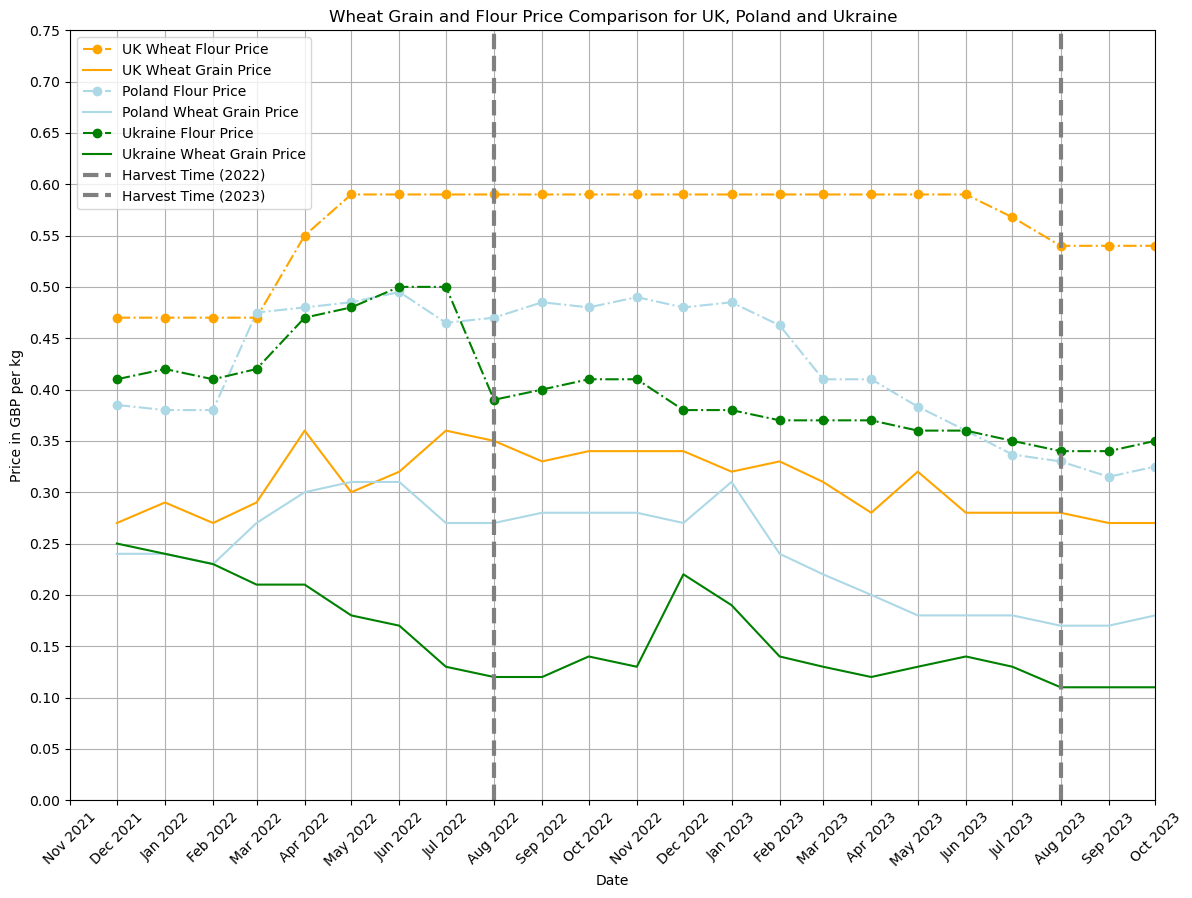


Figure 1. Wheat Grain and Flour Price Comparison for UK, Poland and Ukraine


In [42]:
# converting date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# change the data using pivot_table with mean as the aggregation function
pivot_df = df.pivot_table(index='Date', columns='Country', values=['WheatPricePerKg', 'GrainPricePerKg'], aggfunc='mean')

# creating a line chart
plt.figure(figsize=(14, 10))

# plotting lines for UK Wheat Flour and Grain Prices
plt.plot(pivot_df.index, pivot_df['WheatPricePerKg']['UK'], label='UK Wheat Flour Price', marker='o', linestyle='-.', color ='orange')
plt.plot(pivot_df.index, pivot_df['GrainPricePerKg']['UK'], label='UK Wheat Grain Price', color = 'orange')

# plotting lines for Poland Flour and Grain Prices
plt.plot(pivot_df.index, pivot_df['WheatPricePerKg']['Poland'], label='Poland Flour Price', marker='o', linestyle='-.', color = 'lightblue')
plt.plot(pivot_df.index, pivot_df['GrainPricePerKg']['Poland'], label='Poland Wheat Grain Price', color = 'lightblue')

# plotting lines for Ukraine Flour and Grain Prices
plt.plot(pivot_df.index, pivot_df['WheatPricePerKg']['Ukraine'], label='Ukraine Flour Price', marker='o', linestyle='-.', color = 'green')
plt.plot(pivot_df.index, pivot_df['GrainPricePerKg']['Ukraine'], label='Ukraine Wheat Grain Price', color = 'green')

# plotting vertical lines for August, excluding August 2021 to indicate the harvest time
for year in range(df['Date'].dt.year.min(), df['Date'].dt.year.max() + 1):
    if year != 2021:  # Skip August 2021
        plt.axvline(pd.Timestamp(f'{year}-08-01'), color='gray', linestyle='--', linewidth=3, label=f'Harvest Time ({year})')

plt.title('Wheat Grain and Flour Price Comparison for UK, Poland and Ukraine')
plt.xlabel('Date')
plt.ylabel('Price in GBP per kg')
plt.legend()
plt.grid(True)

# setting x-axis limits to start from November 2021
plt.xlim(pd.Timestamp('2021-11-01'), pivot_df.index.max())

# formatting x-axis ticks to show every month/year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# rotating x-axis labels by 45 degrees
plt.xticks(rotation=45)

# setting y-axis ticks at intervals of 0.05 and finish at 0.75
plt.yticks([i/100 for i in range(0, 80, 5)])

# setting y-axis limits to finish at 0.75
plt.ylim(0, 0.75)


plt.show()

print()
print('Figure 1. Wheat Grain and Flour Price Comparison for UK, Poland and Ukraine')

Figure 1 illustrates a price comparison between wheat grain and wheat flour among the UK, Poland, and Ukraine. Notably, Ukraine offers the lowest prices, while the UK has the highest, and Poland falls in the middle. This pattern mirrors each country's wheat market dynamics, with Ukraine being the top producer, offering competitive prices due to a higher wheat quantity. In contrast, the UK produces a lower quantity of wheat.

In [43]:
#looking at the summary statistics 
df.describe()

,Date,Price per kg,Exchange rate,WheatPricePerKg,GrainPricePerTon,GrainPricePerKg
count,215,215.000000,215.000000,215.000000,215.000000,215.000000
mean,2022-12-07 23:33:12.558139648,2.698093,6.440605,0.520140,278.572837,0.278651
min,2021-12-01 00:00:00,0.470000,1.000000,0.290000,106.400000,0.110000
25%,2022-08-01 00:00:00,0.590000,1.000000,0.470000,269.250000,0.270000
50%,2023-01-01 00:00:00,0.590000,1.000000,0.590000,283.350000,0.280000
75%,2023-05-01 00:00:00,2.140000,5.350000,0.590000,331.340000,0.330000
max,2023-10-01 00:00:00,18.340000,47.270000,0.590000,360.720000,0.360000
std,NaN,4.926834,12.647610,0.087213,62.736560,0.062730


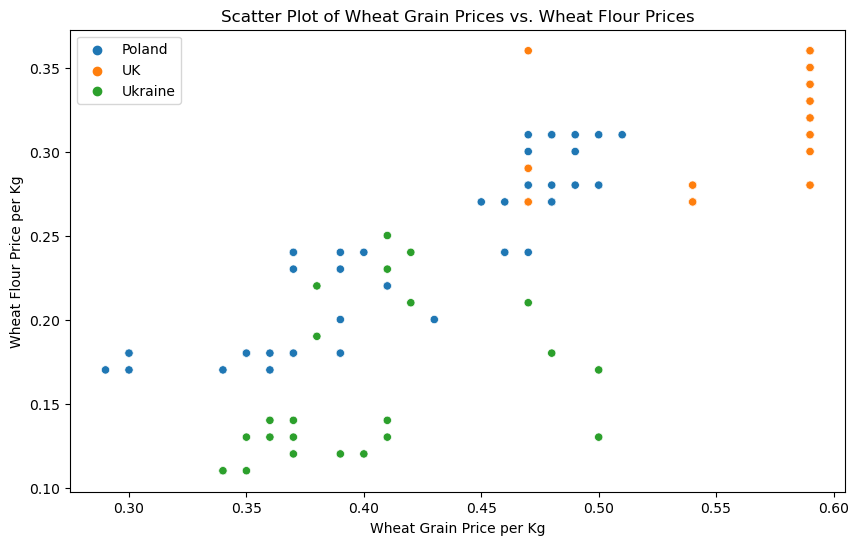


Figure 2. Wheat Grain and Flour Price scatterplot


In [44]:
# visualising the relationship between Wheat Grain prices and Wheat Flour prices using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WheatPricePerKg', y='GrainPricePerKg', data=df, hue='Country')
plt.title('Scatter Plot of Wheat Grain Prices vs. Wheat Flour Prices')
plt.xlabel('Wheat Grain Price per Kg')
plt.ylabel('Wheat Flour Price per Kg')
plt.legend()
plt.show()

print()
print('Figure 2. Wheat Grain and Flour Price scatterplot')

Positive correlation between grain and flour prices are mostly observed in case of Poland

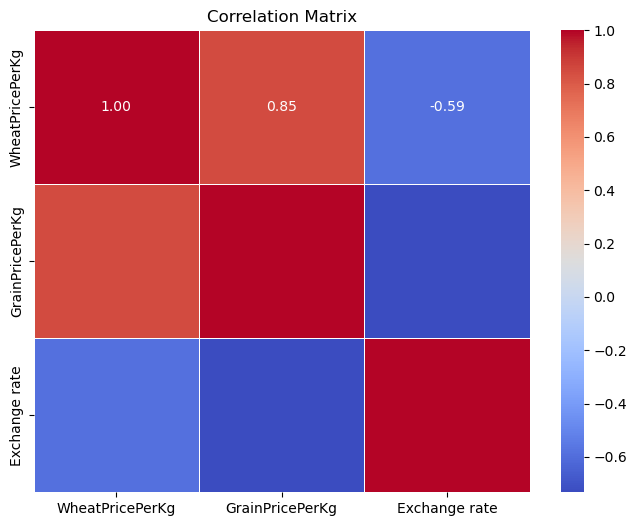


Figure 3. Correlation Matrix


In [46]:
correlation_matrix = df[['WheatPricePerKg', 'GrainPricePerKg', 'Exchange rate']].corr()

# visualise the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

print()
print('Figure 3. Correlation Matrix')

In [47]:
df.groupby(['Country'])['WheatPricePerKg'].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Poland,50.0,0.423600,0.063656,0.29,0.370,0.455,0.480,0.51
UK,142.0,0.573662,0.034773,0.47,0.590,0.590,0.590,0.59
Ukraine,23.0,0.399565,0.048381,0.34,0.365,0.390,0.415,0.50


In [48]:
df.groupby(['Country'])['GrainPricePerKg'].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Poland,50.0,0.24000,0.048065,0.17,0.180,0.24,0.28,0.31
UK,142.0,0.31162,0.029647,0.27,0.280,0.32,0.34,0.36
Ukraine,23.0,0.15913,0.046409,0.11,0.125,0.14,0.20,0.25


In [49]:
df['Quarter'] = df['Date'].dt.quarter
# summary statistics for wheat flour price per quarter and country
summary_stats = df.groupby(['Quarter', 'Country'])['WheatPricePerKg'].describe()

In [50]:
# summary statistics for grain price per quarter and country
summary_stats2 = df.groupby(['Quarter', 'Country'])['GrainPricePerKg'].describe()

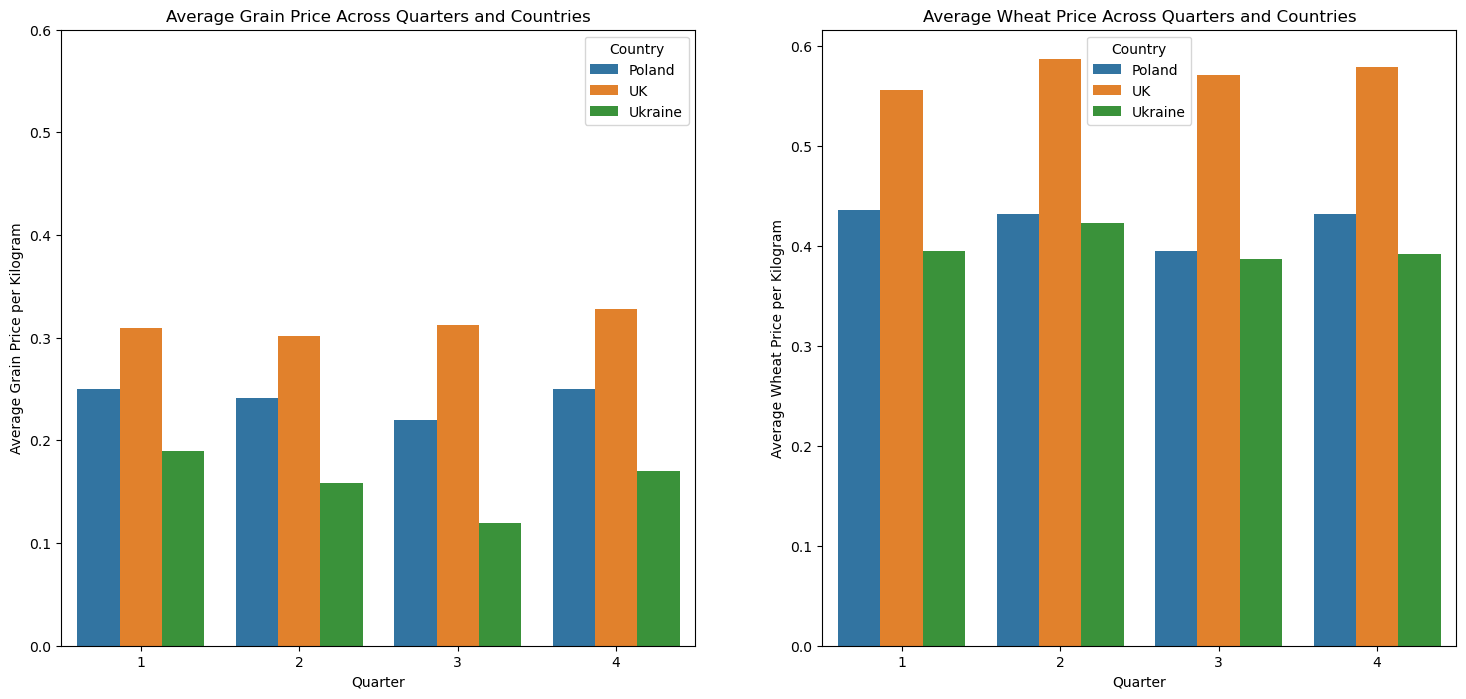


Figure 4. Wheat Grain and Flour Price Comparison for UK, Poland and Ukraine


In [51]:
# resetting index to make quarter and country columns accessible for plotting
summary_stats_reset = summary_stats.reset_index()
summary_stats2_reset = summary_stats2.reset_index()

#plotting
fig, ax = plt.subplots(ncols=2, figsize=(18, 8))
sns.barplot(x='Quarter', y='mean', hue='Country', data=summary_stats2_reset, ci=None, ax=ax[0])
ax[0].set_title('Average Grain Price Across Quarters and Countries')
ax[0].set_xlabel('Quarter')
ax[0].set_ylabel('Average Grain Price per Kilogram')
ax[0].set_ylim(0, 0.6)
sns.barplot(x='Quarter', y='mean', hue='Country', data=summary_stats_reset, ci=None, ax=ax[1])
ax[1].set_title('Average Wheat Price Across Quarters and Countries')
ax[1].set_xlabel('Quarter')
ax[1].set_ylabel('Average Wheat Price per Kilogram')
plt.legend(title='Country')
plt.show()
print()
print('Figure 4. Wheat Grain and Flour Price Comparison for UK, Poland and Ukraine')

In [52]:
df['Month'] = df['Date'].dt.month
# summary statistics for grain prices per month and country
summary_stats_m = df.groupby(['Month', 'Country'])['GrainPricePerKg'].describe()

In [53]:
# summary statistics for wheat flour price per month and country
summary_stats_m2 = df.groupby(['Month', 'Country'])['WheatPricePerKg'].describe()

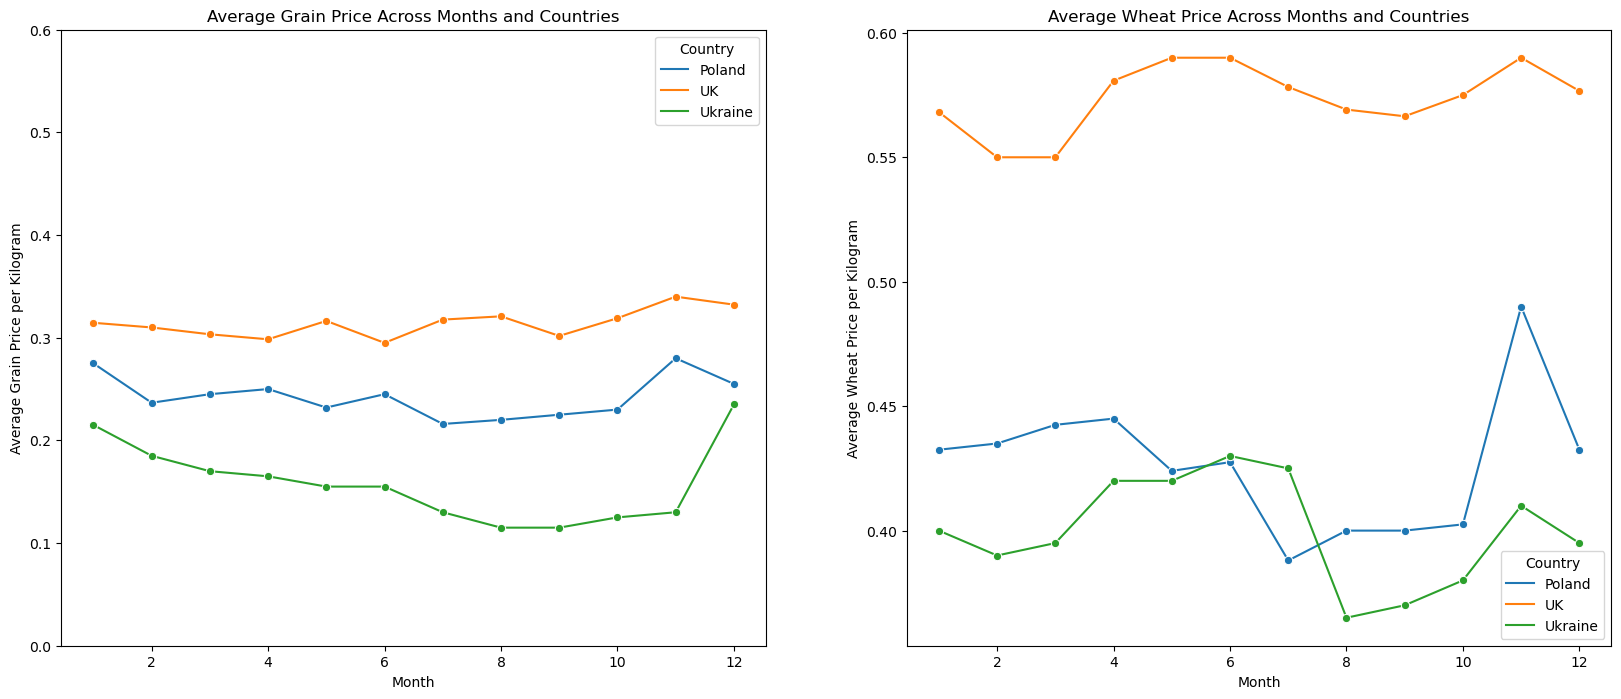


Figure 5. Wheat Grain and Flour Price Comparison for UK, Poland and Ukraine


In [55]:
summary_stats_m_reset = summary_stats_m.reset_index()
summary_stats_m2_reset = summary_stats_m2.reset_index()
# plotting
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))

# line plot for Grain Price
sns.lineplot(x='Month', y='mean', hue='Country', data=summary_stats_m_reset, ax=ax[0], marker='o')
ax[0].set_title('Average Grain Price Across Months and Countries')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Average Grain Price per Kilogram')
ax[0].set_ylim(0, 0.6)

# line plot for Wheat Price
sns.lineplot(x='Month', y='mean', hue='Country', data=summary_stats_m2_reset, ax=ax[1], marker='o')
ax[1].set_title('Average Wheat Price Across Months and Countries')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Average Wheat Price per Kilogram')

plt.legend(title='Country')
plt.show()

print()
print('Figure 5. Wheat Grain and Flour Price Comparison for UK, Poland and Ukraine')


#### Wheat grain volatility

In [56]:
volatility_grain = np.std(df.GrainPricePerKg)
volatility_grain

0.06258422556320076

The volatility of grain prices, represented by a standard deviation of around 0.06, indicates a relatively low level of fluctuation in the market. 

In [57]:
# calculating monthly percentage changes
df['Monthly_Percentage_Change_Grain'] = df.groupby(df['Date'].dt.to_period("M"))['GrainPricePerKg'].pct_change() * 100
# calculating overall volatility / Coefficient of Variation
overall_volatility_grain = df['GrainPricePerKg'].std() / df['GrainPricePerKg'].mean()
# calculating returns / Standard Deviation
returns_std_grain = df['Monthly_Percentage_Change_Grain'].std()

print("\nOverall Volatility (Coefficient of Variation):", overall_volatility_grain)

print("\nReturns (Standard Deviation):", returns_std_grain)


Overall Volatility (Coefficient of Variation): 0.22512118498125439

Returns (Standard Deviation): 21.77751090715131


The overall volatility, expressed as the coefficient of variation at 0.2251, suggests a moderate to high degree of price fluctuation in the market. Concurrently, the returns, characterized by a standard deviation of 21.78, further emphasize the relatively volatile nature of the commodity under consideration.

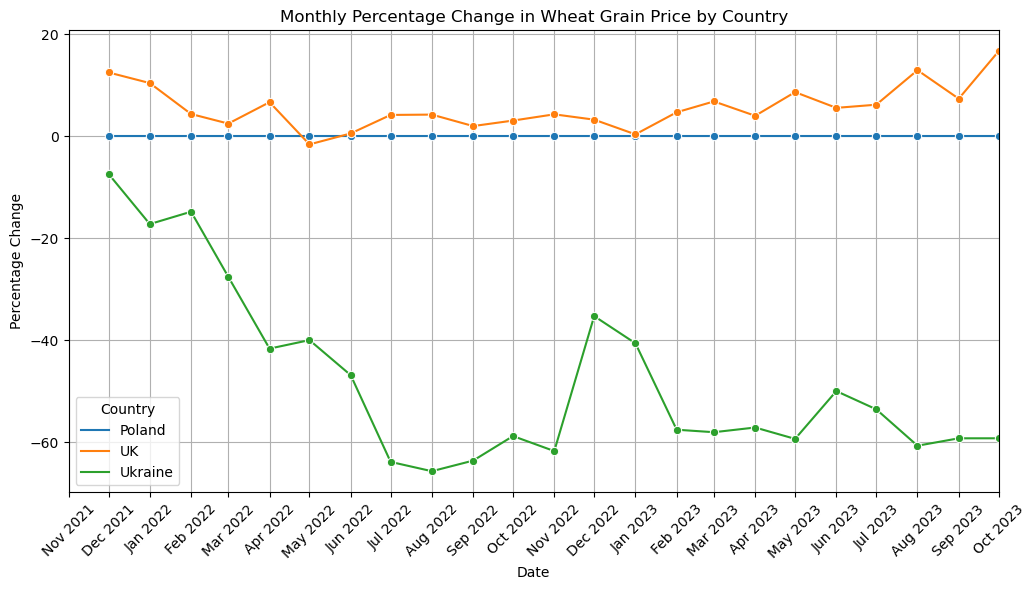

Figure 6. Monthly Percentage Change in Wheat Grain Price by Country


In [58]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Monthly_Percentage_Change_Grain', hue='Country', marker='o', ci=None,)
plt.title('Monthly Percentage Change in Wheat Grain Price by Country')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend(title='Country')
# setting x-axis limits to start from November 2021
plt.xlim(pd.Timestamp('2021-11-01'), pivot_df.index.max())

# formatting x-axis ticks to show every month/year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# rotating x-axis labels by 45 degrees
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print('Figure 6. Monthly Percentage Change in Wheat Grain Price by Country')

The monthly percentage change in price is a measure that indicates the relative change in the price of a product from one month to the next, expressed as a percentage. 

In case of Uk and Poland the grain price fluctuation seems to be stable, which suggest low volatility or stable prices in the market. However in the Ukraine there is sharp decrese in prices from month to month, sugessing high grain price volaility.   

This information helps in understanding the volatility or fluctuations in the price of grain flour. Large percentage changes, whether positive or negative, suggest higher volatility. Analyzing these changes over time can provide insights into trends, seasonality, or potential factors influencing the price fluctuations. For example, a sudden spike in price might be associated with external factors such as supply chain disruptions, changes in demand, or other market dynamics.

#### Wheat Flour Price volatility

In [59]:
volatility_std = np.std(df.WheatPricePerKg)
volatility_std

0.08700964431851685

The standard deviation of wheat price in GBP per kilogram, represented by a volatility of 0.0870, signifies a moderate level of variability in the commodity's pricing over the observed period. This suggests a certain degree of stability with fluctuations that are within a reasonable range.

In [60]:
# calculating monthly percentage changes
df['Monthly_Percentage_Change_Flour'] = df.groupby(df['Date'].dt.to_period("M"))['WheatPricePerKg'].pct_change() * 100
# calculating overall volatility / Coefficient of Variation
overall_volatility = df['WheatPricePerKg'].std() / df['WheatPricePerKg'].mean()
# calculating returns / Standard Deviation
returns_std = df['Monthly_Percentage_Change_Flour'].std()
print("\nOverall Volatility (Coefficient of Variation):", overall_volatility)

print("\nReturns (Standard Deviation):", returns_std)


Overall Volatility (Coefficient of Variation): 0.16767174016161013

Returns (Standard Deviation): 19.371701001709894


The overall volatility, represented by the Coefficient of Variation (0.1677), indicates a moderate level of variability in wheat flour prices. The Returns, measured by the Standard Deviation (19.37), suggest that the prices have experienced fluctuations around the mean, with a moderate level of dispersion. Overall, these metrics portray a market for wheat flour that exhibits moderate price variability.

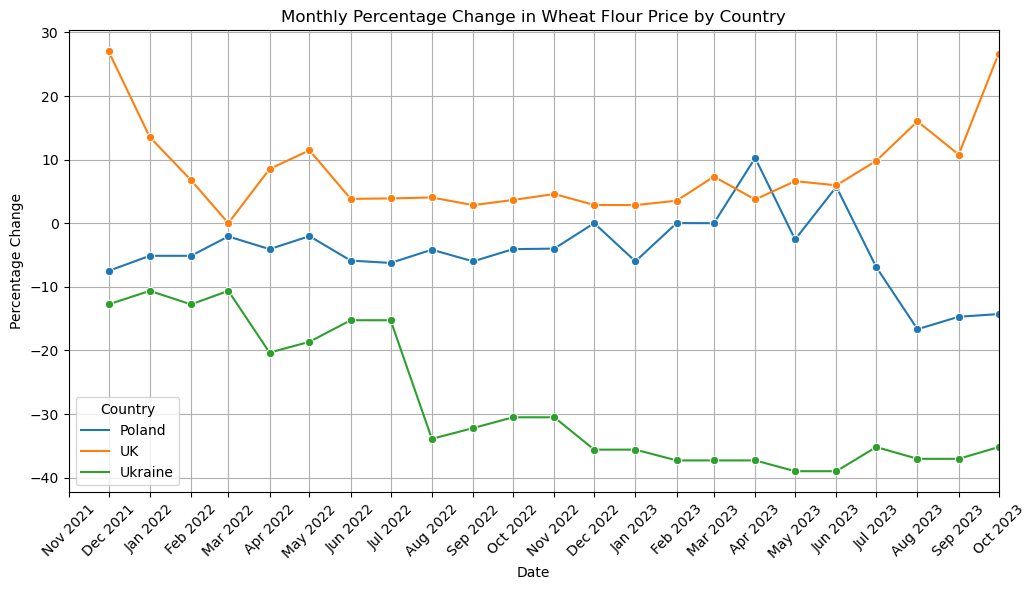

Figure 7. Monthly Percentage Change in Wheat Flour Price by Country


In [61]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Monthly_Percentage_Change_Flour', hue='Country', marker='o', ci=None,)
plt.title('Monthly Percentage Change in Wheat Flour Price by Country')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend(title='Country')
# setting x-axis limits to start from November 2021
plt.xlim(pd.Timestamp('2021-11-01'), pivot_df.index.max())

# formatting x-axis ticks to show every month/year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# rotatting x-axis labels by 45 degrees
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print('Figure 7. Monthly Percentage Change in Wheat Flour Price by Country')

The monthly percentage change in price is a measure that indicates the relative change in the price of a product from one month to the next, expressed as a percentage. 

In case of Uk in November 2021 with a 30% of monthly change, it suggests that the price rose by 30% compared to the previous month. In February 2022 with a 0% change, it indicates that the price remained the same as the previous month.In April 2022 with around 12% increase, it implies a rise of price compared to the previous month.
In case of Poland change in price seems to be stable until March 2023, when it increse by 10% to then gradually fluctuate and sharp decrese in pice can be observed from June onward.
Changes of prices in case of Ukraine shows sharp and continuous decrese in wheat flour prices.

In [62]:
#setting up the subsets for further analysis
wheat_PL = df[df.Country =='Poland'].WheatPricePerKg
wheat_UK = df[df.Country =='UK'].WheatPricePerKg
wheat_UA = df[df.Country =='Ukraine'].WheatPricePerKg
grain_PL = df[df.Country =='Poland'].GrainPricePerKg
grain_UK = df[df.Country =='UK'].GrainPricePerKg
grain_UA = df[df.Country =='Ukraine'].GrainPricePerKg

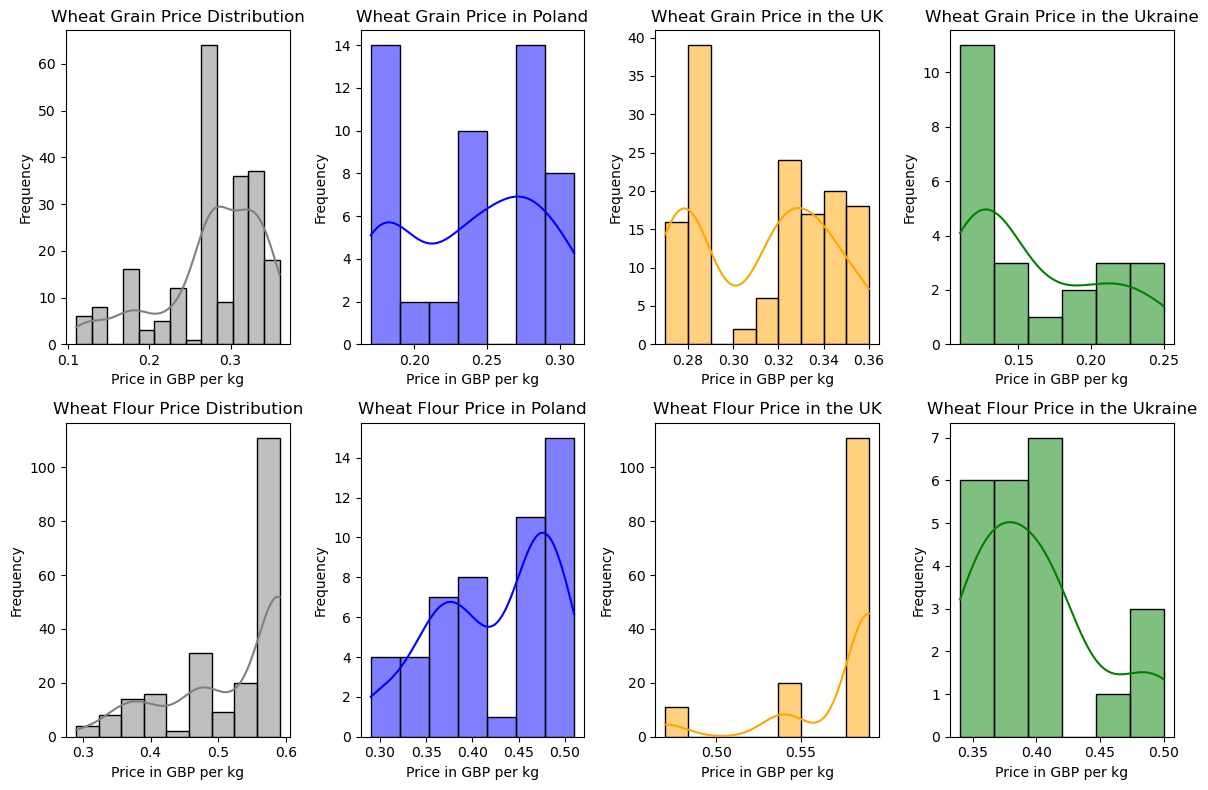

Figure 8. Price Distribution of Wheat Grain and Wheat Flour


In [63]:
#plotting subplots for wheat grain and wheat flour price distribution
plt.figure(figsize=(12, 8))

plt.subplot(2,4,1)  
sns.histplot(df['GrainPricePerKg'], kde=True, color = 'grey')
plt.title('Wheat Grain Price Distribution')
plt.xlabel('Price in GBP per kg')
plt.ylabel('Frequency')

plt.subplot(2,4,2)  
sns.histplot(grain_PL, kde=True, color='blue')
plt.title('Wheat Grain Price in Poland')
plt.xlabel('Price in GBP per kg')
plt.ylabel('Frequency')

plt.subplot(2,4,3)  
sns.histplot(grain_UK, kde=True, color='orange')
plt.title('Wheat Grain Price in the UK')
plt.xlabel('Price in GBP per kg')
plt.ylabel('Frequency')

plt.subplot(2,4,4)  
sns.histplot(grain_UA, kde=True, color='green')
plt.title('Wheat Grain Price in the Ukraine')
plt.xlabel('Price in GBP per kg')
plt.ylabel('Frequency')

plt.subplot(2,4,5)  
sns.histplot(df['WheatPricePerKg'], kde=True, color = 'grey')
plt.title('Wheat Flour Price Distribution')
plt.xlabel('Price in GBP per kg')
plt.ylabel('Frequency')

plt.subplot(2,4,6) 
sns.histplot(wheat_PL, kde=True, color='blue')
plt.title('Wheat Flour Price in Poland')
plt.xlabel('Price in GBP per kg')
plt.ylabel('Frequency')

plt.subplot(2,4,7)  
sns.histplot(wheat_UK, kde=True, color='orange')
plt.title('Wheat Flour Price in the UK')
plt.xlabel('Price in GBP per kg')
plt.ylabel('Frequency')

plt.subplot(2,4,8) 
sns.histplot(wheat_UA, kde=True, color='green')
plt.title('Wheat Flour Price in the Ukraine')
plt.xlabel('Price in GBP per kg')
plt.ylabel('Frequency')

plt.tight_layout()


plt.show()

print('Figure 8. Price Distribution of Wheat Grain and Wheat Flour')

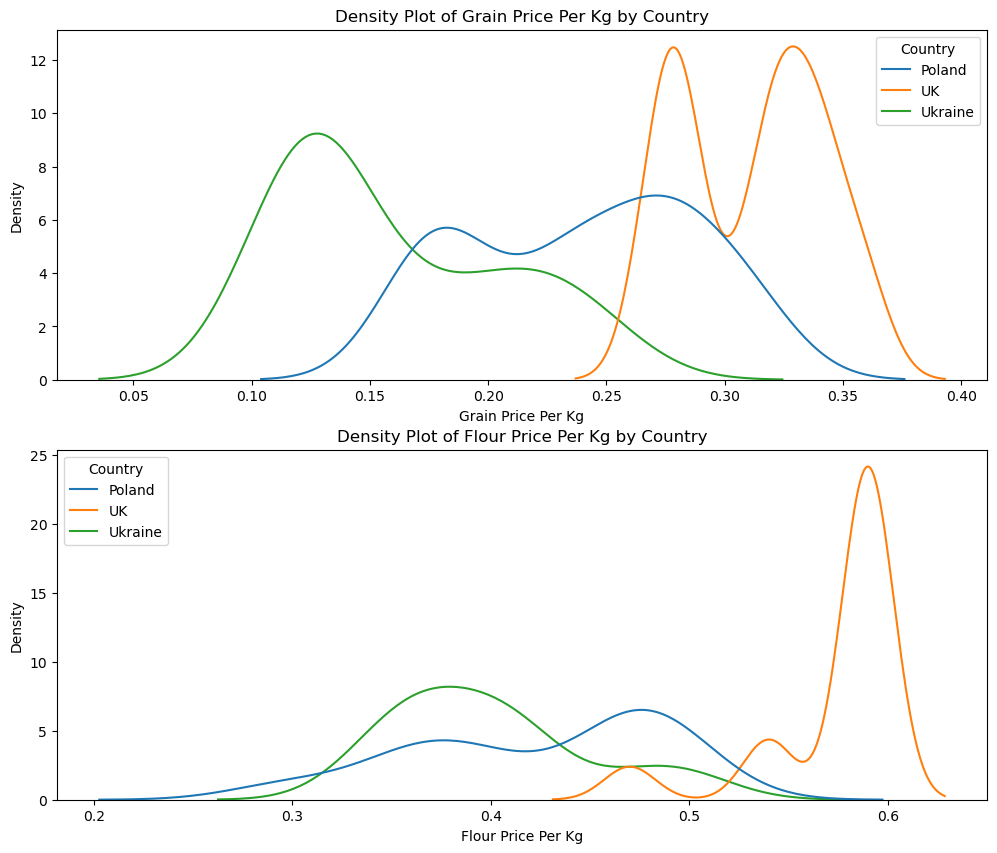


Figure 9. Density plots


In [64]:
fig, ax = plt.subplots(nrows=2, figsize=(12, 10))
sns.kdeplot(data=df, x='GrainPricePerKg', hue='Country', fill=False, common_norm=False, ax = ax[0])

ax[0].set_xlabel('Grain Price Per Kg')
ax[0].set_ylabel('Density')
ax[0].set_title('Density Plot of Grain Price Per Kg by Country')


sns.kdeplot(data=df, x='WheatPricePerKg', hue='Country', fill=False, common_norm=False, ax=ax[1])

ax[1].set_xlabel('Flour Price Per Kg')
ax[1].set_ylabel('Density')
ax[1].set_title('Density Plot of Flour Price Per Kg by Country')

plt.show()

print()
print('Figure 9. Density plots')

* Grain Price distribution:

The right-skewed distribution in Ukraine indicates that the majority of grain prices are concentrated toward the lower end of the scale. This suggests that higher prices are less common, and the distribution has a longer right tail. Factors leading to this skewness might include economic conditions or production dynamics that result in a more restricted range of higher prices.

The shape resembling a normal distribution in Poland implies that grain prices are relatively evenly spread across the range, forming a bell-shaped curve. More dispersion reflects a wider spread of prices, with more variability compared to the other countries. 

The presence of two peaks in the distribution of grain prices in the UK could be indicative of a bimodal distribution. This could be the response within the UK market to these external shocks in wheat market worldwide, leading to different price clusters. 

The limited overlap between the distributions of the UK and Ukraine shows that these two countries have distinct patterns in grain pricing.

* Wheat Price distribution 

The density plots for wheat flour prices indicate different distribution patterns in each country. In Ukraine, the distribution appears somewhat normal but flat, suggesting a relatively consistent pricing trend. Poland exhibits an even flatter and more dispersed distribution, indicating a wider range of prices with less distinct peaks. The UK's left-skewed distribution implies that lower prices are less prevalent

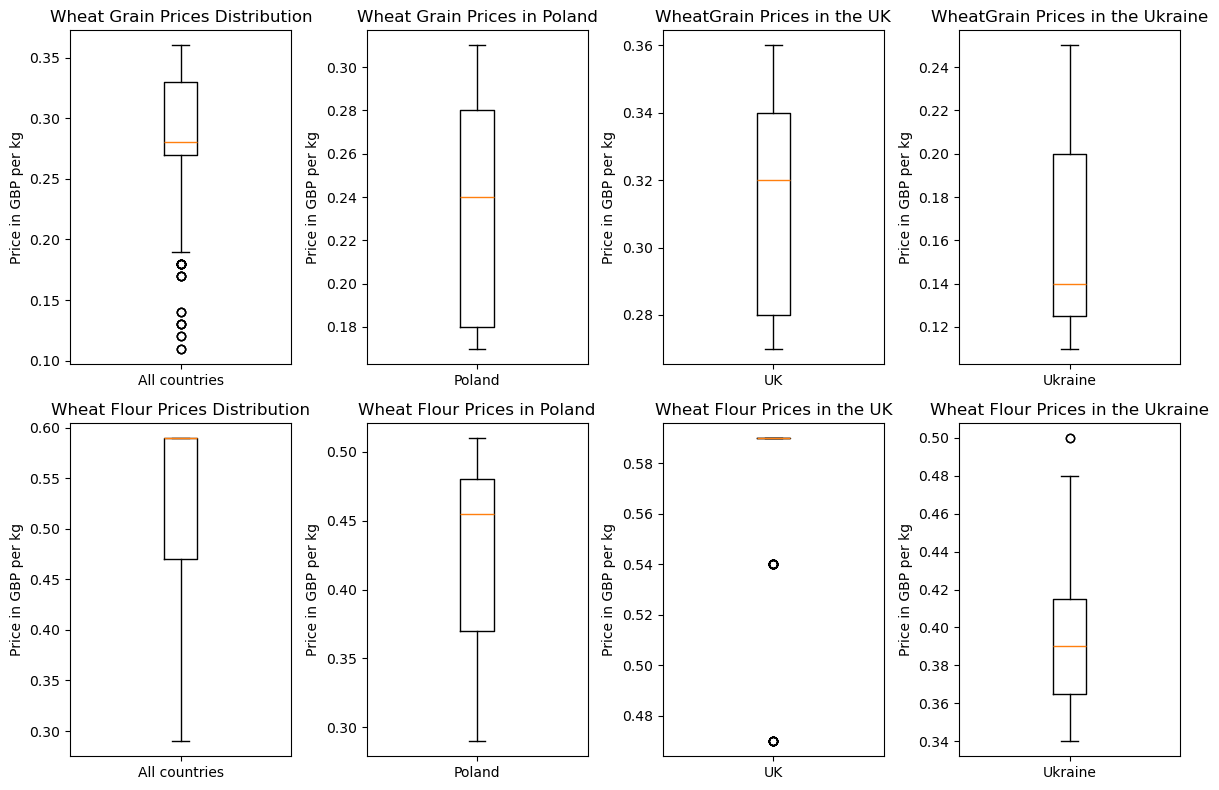

Figure 10. Price Distribution of Wheat Grain and Wheat Flour


In [65]:
# creating subplots for the boxplots to visualise the price distribution and any outliers
plt.figure(figsize=(12, 8))

plt.subplot(2,4,1) 
plt.boxplot(df['GrainPricePerKg'], labels=['All countries'])
plt.title('Wheat Grain Prices Distribution')
plt.ylabel('Price in GBP per kg')

plt.subplot(2,4,2)  
plt.boxplot(grain_PL, labels=['Poland'])
plt.title('Wheat Grain Prices in Poland')
plt.ylabel('Price in GBP per kg')

plt.subplot(2,4,3) 
plt.boxplot(grain_UK, labels=['UK'])
plt.title('WheatGrain Prices in the UK')
plt.ylabel('Price in GBP per kg')

plt.subplot(2,4,4) 
plt.boxplot(grain_UA, labels=['Ukraine'])
plt.title('WheatGrain Prices in the Ukraine')
plt.ylabel('Price in GBP per kg')

plt.subplot(2,4,5) 
plt.boxplot(df['WheatPricePerKg'], labels=['All countries'])
plt.title('Wheat Flour Prices Distribution')
plt.ylabel('Price in GBP per kg')

plt.subplot(2,4,6) 
plt.boxplot(wheat_PL, labels=['Poland'])
plt.title('Wheat Flour Prices in Poland')
plt.ylabel('Price in GBP per kg')

plt.subplot(2,4,7)  
plt.boxplot(wheat_UK, labels=['UK'])
plt.title('Wheat Flour Prices in the UK')
plt.ylabel('Price in GBP per kg')

plt.subplot(2,4,8)  
plt.boxplot(wheat_UA, labels=['Ukraine'])
plt.title('Wheat Flour Prices in the Ukraine')
plt.ylabel('Price in GBP per kg')
plt.tight_layout()


plt.show()

print('Figure 10. Price Distribution of Wheat Grain and Wheat Flour')

### Wheat grain prices distribution

Poland: The distribution of grain prices in Poland is centered around a mean of 0.24. The prices vary from 0.17 to 0.31, indicating a moderate level of variability. The interquartile range (IQR) suggests that 50% of prices fall within the range of 0.18 to 0.28.

UK: Grain prices in the United Kingdom exhibit a higher mean of 0.3116, with a relatively low standard deviation of 0.0296. The distribution is less variable compared to Poland, with prices ranging from 0.27 to 0.36. The IQR indicates that 50% of prices fall within the range of 0.28 to 0.34.

Ukraine: The distribution of grain prices in Ukraine shows a lower mean of 0.1591 and a wider standard deviation, suggesting higher variability. Prices range from 0.11 to 0.25, with the IQR indicating that 50% of prices fall within the range of 0.125 to 0.20.

### Wheat flour price distribution

Poland: The distribution of wheat flour prices in Poland appears to be relatively moderate, with an average (mean) price of 0.4236. The prices vary from 0.29 to 0.51, and the interquartile range (IQR) suggests moderate variability around the median.

UK: Wheat flour prices in the United Kingdom exhibit less variability compared to Poland. The prices range from 0.47 to 0.59, with an average of 0.5737. Notably, 75% of the prices are clustered around the upper limit of 0.59, indicating a more stable distribution.

Ukraine: The distribution of wheat flour prices in Ukraine is characterized by an average of 0.3996 and a range from 0.34 to 0.50. The IQR suggests moderate variability around the median, with 50% of prices falling below 0.390 and 75% below 0.415.

## STATISTICAL ANALYSIS WITH ANOVA

In [66]:
from scipy import stats
from scipy.stats import f
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### Mean of each group - Flour Price

In [67]:
#mean of each group - Flour price
wheat_A = df[df.Country =='Poland'].WheatPricePerKg.mean()
wheat_B = df[df.Country =='UK'].WheatPricePerKg.mean()
wheat_C = df[df.Country =='Ukraine'].WheatPricePerKg.mean()
wheat_total = df.WheatPricePerKg.mean()

In [68]:
wheat_A

0.4236000000000001

In [69]:
wheat_B

0.5736619718309859

In [70]:
wheat_C

0.3995652173913044

In [71]:
wheat_total

0.5201395348837209

### Mean of each group - Grain Price

In [72]:
#mean of each group - grain price
grain_A = df[df.Country =='Poland'].GrainPricePerKg.mean()
grain_B = df[df.Country =='UK'].GrainPricePerKg.mean()
grain_C = df[df.Country =='Ukraine'].GrainPricePerKg.mean()
grain_total = df.GrainPricePerKg.mean()

In [73]:
grain_A

0.24

In [74]:
grain_B

0.31161971830985913

In [75]:
grain_C

0.1591304347826087

In [76]:
grain_total

0.2786511627906977

### Calculating the between SSD (SSB)

In [77]:
# calculate the between-group SSD (SSB) for Wheat Prices
ssb_wheat_PL = len(wheat_PL) * (wheat_A - wheat_total)**2
ssb_wheat_UK = len(wheat_UK) * (wheat_B - wheat_total)**2
ssb_wheat_UA = len(wheat_UA) * (wheat_C - wheat_total)**2
ssb_wheat_total = ssb_wheat_PL + ssb_wheat_UK + ssb_wheat_UA
print("Between-Group Sum of Squares (SSB):", ssb_wheat_total)

Between-Group Sum of Squares (SSB): 1.2071523871316863


In [78]:
# calculating the between-group SSD (SSB) for Grain Prices
ssb_grain_PL = len(grain_PL) * (grain_A - grain_total)**2
ssb_grain_UK = len(grain_UK) * (grain_B - grain_total)**2
ssb_grain_UA = len(grain_UA) * (grain_C - grain_total)**2
ssb_grain_total = ssb_grain_PL + ssb_grain_UK + ssb_grain_UA
print("Between-Group Sum of Squares (SSB):", ssb_grain_total)

Between-Group Sum of Squares (SSB): 0.5575987637249176


### Calculating the within group sum of squares (SSW)

In [79]:
# calculating the within-group sum of squares (SSW) for Wheat Prices
ssw_wheat_PL = ((wheat_PL - wheat_A) ** 2).sum()
ssw_wheat_UK = ((wheat_UK - wheat_B) ** 2).sum()
ssw_wheat_UA = ((wheat_UA - wheat_C) ** 2).sum()
ssw_wheat_total = ssw_wheat_PL + ssw_wheat_UK + ssw_wheat_UA
print("Within-Group Sum of Squares (SSW):", ssw_wheat_total)

Within-Group Sum of Squares (SSW): 0.4205434268218003


In [80]:
# calculating the within-group sum of squares (SSW) for Grain Prices
ssw_grain_PL = ((grain_PL - grain_A) ** 2).sum()
ssw_grain_UK = ((grain_UK - grain_B) ** 2).sum()
ssw_grain_UA = ((grain_UA - grain_C) ** 2).sum()
ssw_grain_total = ssw_grain_PL + ssw_grain_UK + ssw_grain_UA
print("Within-Group Sum of Squares (SSW):", ssw_grain_total)

Within-Group Sum of Squares (SSW): 0.2845100734843845


### Calculating degrees of freedom

In [81]:

k = 3  # number of groups (countries)

# degrees of freedom for SSB (Between-Group Sum of Squares)
df_ssb_wheat = k - 1
df_ssb_grain = k - 1

# total number of data points
N = len(df)

# degrees of freedom for SSW (Within-Group Sum of Squares)
df_ssw_wheat = N - k
df_ssw_grain = N - k

# total degrees of freedom
df_total = N - 1

print("Degrees of Freedom for SSB (Wheat Prices):", df_ssb_wheat)
print("Degrees of Freedom for SSB (Grain Prices):", df_ssb_grain)
print("Degrees of Freedom for SSW (Wheat Prices):", df_ssw_wheat)
print("Degrees of Freedom for SSW (Grain Prices):", df_ssw_grain)
print("Total Degrees of Freedom:", df_total)

Degrees of Freedom for SSB (Wheat Prices): 2
Degrees of Freedom for SSB (Grain Prices): 2
Degrees of Freedom for SSW (Wheat Prices): 212
Degrees of Freedom for SSW (Grain Prices): 212
Total Degrees of Freedom: 214


### Calculating F statistics for wheat prices

In [82]:
#calculating mean squares (MSB and MSW)

MSB_wheat = ssb_wheat_total / df_ssb_wheat
MSW_wheat = ssw_wheat_total / df_ssw_wheat
#calculating F statistic
F_wheat = MSB_wheat / MSW_wheat
F_wheat

304.2685841102905

In [83]:
# defining the significance level (alpha)
alpha = 0.05

# calculating the critical F-value
critical_f_wheat = f.ppf(1 - alpha, df_ssb_wheat, df_ssw_wheat)
# calculating the p-value using the cumulative distribution function (CDF)
p_value = 1 - f.cdf(F_wheat, df_ssb_wheat, df_ssw_wheat)

In [84]:
#performing the hypothesis test
if F_wheat > critical_f_wheat:
    print(f"F-statistic: {F_wheat:.2f}")
    print(f"Critical F-value: {critical_f_wheat:.2f}")
    print(f"p-value: {p_value:.4f}")
    print("Reject the null hypothesis: There are significant differences between group means.")
else:
    print(f"F-statistic: {F_wheat:.2f}")
    print(f"Critical F-value: {critical_f_wheat:.2f}")
    print(f"p-value: {p_value:.4f}")
    print("Fail to reject the null hypothesis: No significant differences between group means.")

F-statistic: 304.27
Critical F-value: 3.04
p-value: 0.0000
Reject the null hypothesis: There are significant differences between group means.


In [85]:
# calculate the p-value using the cumulative distribution function (CDF)
p_value = 1 - f.cdf(F_wheat, df_ssb_wheat, df_ssw_wheat)


print(f"F-statistic: {F_wheat:.2f}")
print(f"p-value: {p_value:.4f}")


if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences between the mean wheat flour prices for each country.")
else:
    print("Fail to reject the null hypothesis: No significant differences between the mean wheat flour prices for each country.")

F-statistic: 304.27
p-value: 0.0000
Reject the null hypothesis: There are significant differences between the mean wheat flour prices for each country.


### Calculating F statistics for wheat grain

In [86]:
#calculating Mean Squares (MSB and MSW)
#grain
MSB_grain = ssb_grain_total / df_ssb_grain
MSW_grain = ssw_grain_total / df_ssw_grain
#Calculating F statistic
F_grain = MSB_grain / MSW_grain
F_grain

207.74473195616147

In [87]:
# defining the significance level (alpha)
alpha = 0.05

# calculating the critical F-value
critical_f_grain = f.ppf(1 - alpha, df_ssb_grain, df_ssw_grain)
# calculating the p-value using the cumulative distribution function (CDF)
p_value = 1 - f.cdf(F_grain, df_ssb_grain, df_ssw_grain)

In [88]:
#performing the hypothesis test
if F_wheat > critical_f_grain:
    print(f"F-statistic: {F_grain:.2f}")
    print(f"Critical F-value: {critical_f_grain:.2f}")
    print(f"p-value: {p_value:.4f}")
    print("Reject the null hypothesis: There are significant differences between the mean wheat grain prices for each country.")
else:
    print(f"F-statistic: {F_grain:.2f}")
    print(f"Critical F-value: {critical_f_grain:.2f}")
    print(f"p-value: {p_value:.4f}")
    print("Fail to reject the null hypothesis: No significant differences between the mean wheat grain prices for each country.")

F-statistic: 207.74
Critical F-value: 3.04
p-value: 0.0000
Reject the null hypothesis: There are significant differences between the mean wheat grain prices for each country.


## Anova using python's scipy

#### Wheat flour price

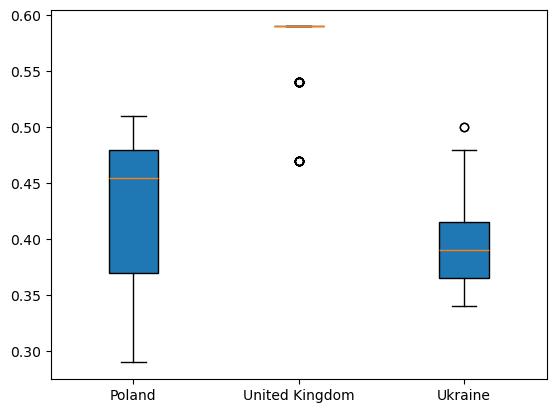

F_onewayResult(statistic=304.26858411029133, pvalue=4.97950168060344e-63) 

Significant differences exist between the mean price of wheat flour for each country.

Figure 11. One-way ANOVA for wheat flour price mean


In [89]:
# creating side-by-side boxplots for the wheat flour for both countries
box_plot_data=[wheat_PL, wheat_UK, wheat_UA]
plt.boxplot(box_plot_data,patch_artist=True,labels=['Poland','United Kingdom', 'Ukraine'])
plt.show()

# performing one-way ANOVA
anova = stats.f_oneway(wheat_PL, wheat_UK, wheat_UA)
print(anova, "\n")

# testing significance
alpha= 0.05
if (anova[1] < alpha):
    print("Significant differences exist between the mean price of wheat flour for each country.")
else: 
    print ("No significant differences exist between the mean price of wheat flour for each country.")

print()
print('Figure 11. One-way ANOVA for wheat flour price mean')

The ANOVA results (F-statistic = 304.27, p-value < 0.001) suggest that there are significant differences in the price of wheat flour among the countries under consideration. The extremely low p-value provides strong evidence against the null hypothesis, supporting the conclusion that there are statistically significant variations in wheat flour prices across the specified countries. We reject null hypothesis and accept alternative hypothesis.

#### Wheat grain price

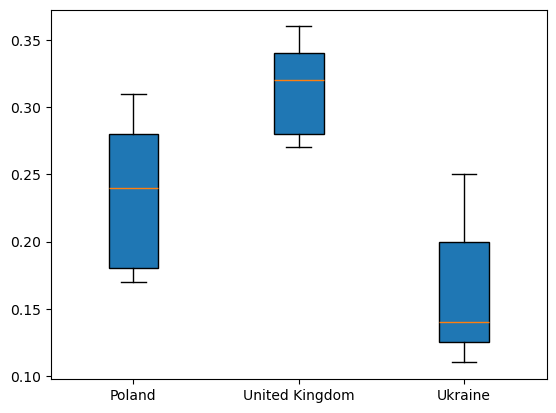

F_onewayResult(statistic=207.74473195616147, pvalue=1.1099893875504434e-50) 

Significant differences exist between the mean price of wheat grain for each country.

Figure 12. One-way ANOVA for wheat grain price mean 


In [90]:
# creating side-by-side boxplots for the wheat flour for both countries
box_plot_data=[grain_PL, grain_UK, grain_UA]
plt.boxplot(box_plot_data,patch_artist=True,labels=['Poland','United Kingdom', 'Ukraine'])
plt.show()

# perform one-way ANOVA
anova = stats.f_oneway(grain_PL, grain_UK, grain_UA)
print(anova, "\n")

# testing significance
alpha= 0.05
if (anova[1] < alpha):
    print("Significant differences exist between the mean price of wheat grain for each country.")
else: 
    print ("No significant differences exist between themean price of wheat grain for each country.")

print()
print('Figure 12. One-way ANOVA for wheat grain price mean ')

The ANOVA results (F-statistic = 207.74, p-value < 0.001) indicate that there are significant differences in the price of wheat grain among the countries under consideration. The extremely low p-value suggests strong evidence against the null hypothesis, supporting the conclusion that there are statistically significant variations in wheat grain prices across the specified countries. We reject null hypothesis and accept alternative hypothesis.

### Pairwise Tukey HSD (Honestly Significant Difference)

#### Wheat Flour Price

In [91]:
# performing ANOVA
country_groups = [df['WheatPricePerKg'][df['Country'] == country] for country in df['Country'].unique()]
_, p_value = f_oneway(*country_groups)

# checking if ANOVA result is significant
if p_value < 0.05:
    # perform Tukey's HSD post-hoc test
    tukey_result = pairwise_tukeyhsd(df['WheatPricePerKg'], df['Country'])
    print(tukey_result)
else:
    print("No significant difference in means.")



Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj  lower   upper  reject
----------------------------------------------------
Poland      UK   0.1501   0.0  0.1328  0.1673   True
Poland Ukraine   -0.024 0.084 -0.0505  0.0025  False
    UK Ukraine  -0.1741   0.0 -0.1977 -0.1505   True
----------------------------------------------------


HSD results for wheat flour prices show significant mean differences between Poland and the UK (meandiff = 0.1501, p < 0.001), indicating that the average wheat flour price in the UK is higher than in Poland. Additionally, there is a significant mean difference between the UK and Ukraine (meandiff = -0.1741, p < 0.001), suggesting that the average wheat flour price in Ukraine is lower than in the UK. However, no significant mean difference was observed between Poland and Ukraine (p = 0.084), implying that their average wheat flour prices are not significantly different at the 0.05 significance level.

#### Wheat Grain Price

In [92]:
# perform ANOVA
country_groups = [df['GrainPricePerKg'][df['Country'] == country] for country in df['Country'].unique()]
_, p_value = f_oneway(*country_groups)

# check if ANOVA result is significant
if p_value < 0.05:
    # perform Tukey's HSD post-hoc test
    tukey_result = pairwise_tukeyhsd(df['GrainPricePerKg'], df['Country'])
    print(tukey_result)
else:
    print("No significant difference in means.")



Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj  lower   upper  reject
----------------------------------------------------
Poland      UK   0.0716   0.0  0.0574  0.0858   True
Poland Ukraine  -0.0809   0.0 -0.1027 -0.0591   True
    UK Ukraine  -0.1525   0.0 -0.1719 -0.1331   True
----------------------------------------------------


HSD results for grain prices reveal significant mean differences between all pairs of countries. Specifically, the mean difference is significant between Poland and the UK (meandiff = 0.0716, p < 0.001), Poland and Ukraine (meandiff = -0.0809, p < 0.001), and the UK and Ukraine (meandiff = -0.1525, p < 0.001). These findings indicate that the average grain prices differ significantly among Poland, the UK, and Ukraine, with each country exhibiting distinct pricing patterns.

### Linear regression with stats models

Intercept of fitted model   = 0.1920
Slope of fitted model = 1.1774
                            OLS Regression Results                            
Dep. Variable:        WheatPricePerKg   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     540.4
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           2.40e-60
Time:                        11:51:09   Log-Likelihood:                 355.70
No. Observations:                 215   AIC:                            -707.4
Df Residuals:                     213   BIC:                            -700.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

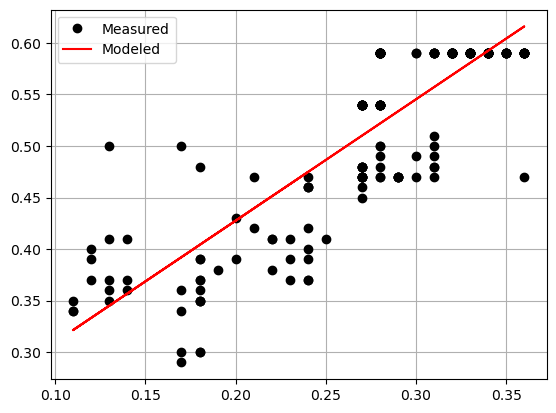


Figure 14. 


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import statsmodels.api as sm



x_data = df.GrainPricePerKg
y_data = df.WheatPricePerKg

x_label = "GrainPricePerKg"
y_label = "WheatPricePerKg"


# importing ols (least-squares regression) from statsmodels, and fit a model to the data
from statsmodels.formula.api import ols

formula = y_label + "~" + x_label
model = ols(formula= formula, data=df)  # formula Y-data ~ X-data
model_fit = model.fit()

# extracting the model parameter values
intercept = model_fit.params['Intercept']
slope = model_fit.params[x_label]
# intercept = model_fit.params[0]     
# slope = model_fit.params[1])       


# model parameter values and summary()
print( "Intercept of fitted model   = {:0.4f}".format(intercept) )
print( "Slope of fitted model = {:0.4f}".format(slope))
print( model_fit.summary() )

print()
print('Figure 13. ')


fig, axis = plt.subplots()

axis.plot(x_data, y_data, linestyle=" ", marker="o", color="black", label="Measured")
x_fit = x_data
y_fit = intercept + slope * x_data

axis.plot(x_data, y_fit, linestyle="-", marker=None, color="red", label="Modeled")
axis.grid(True)
axis.legend(loc="best")
plt.show()

print()
print('Figure 14. ')

Linear regression using stats models were perform to explore relationship between Wheat grain and wheat flour prices. The regression results indicate that, on average, the intercept is 0.1920, representing the estimated WheatPricePerKg when GrainPricePerKg is zero. The coefficient for GrainPricePerKg is 1.1774, suggesting that for each unit increase in GrainPricePerKg, WheatPricePerKg is expected to increase by approximately 1.1774 units, and this relationship is statistically significant (p < 0.001).